# VLE of glassy polymers

This notebook reproduces the data and predictions for isohumidities from the Papers from Kerkhoff et al. The index w denotes water, e denotes ethanol, a denotes the API and p denotes the polymer.

In [1]:
import numpy as np
from diffusionpy import vpure,lngi,NETVLE
import matplotlib.pyplot as plt
from scipy.optimize import root,root_scalar


Then we define the PC-SAFT parameters in a dictionary

In [2]:

par={'kij':np.asarray([-0.038200,-0.022000,-0.128000,-0.001000,0.002673,-0.062100]),
'kijA':np.asarray([0,0,0,0,-0.455211419,0]),
'Mi':np.asarray([18.015,46.069,357.79,65000.]),
'mi':np.asarray([1.2047,2.3827,14.283,2420.99]),
'si':np.asarray([2.79533,3.1771,3.535,2.947]),
'ui':np.asarray([353.95,198.24,262.791,205.27]),
'eAi':np.asarray([2425.7,2653.4,886.4,0.]),
'kAi':np.asarray([0.045099,0.032384,0.02,0.02]),
'NAi':np.asarray([1.,1.,3.,653.])}


Next we define the NET-GP parameters.The pure volume v0p of each component in non equilibrium and the swelling coefficients ksw of the polymer by the solvents. In order for the NETVLE function to identify a solvent we give it a value of -1 for the non-equilibrium volume. A non-solvent component that is not a polymer (in this cas the API) we give it a value of 0.  The swelling coefficients are defined like binary interaction parameters. SInce there is only one polymer and two solvents we define two.
  

In [ ]:
T=303.15
p=1E5
kep=0.2121
kwp=0.
v0p=793.7*1E-6
netpar={'ksw':np.asarray([0.,0.,0.,kwp,kep,0]),
'v0p' : np.asarray([-1.,-1.,0.,v0p])}
par['vpure']=vpure(p,T,**par)


C:\Users\smdoboet\AppData\Local\Temp\ipykernel_11760\2961864431.py:18: RuntimeWarning: divide by zero encountered in log
  RS=NETVLE(T,wi,**netpar,**par,n=1) if NET else np.exp(lngi(T,wi,**par)+np.log(wi))[:2]
C:\Users\smdoboet\AppData\Roaming\Python\Python311\site-packages\mpltern\_ternary_parsers.py:42: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  return f(ax, *args, **kwargs)


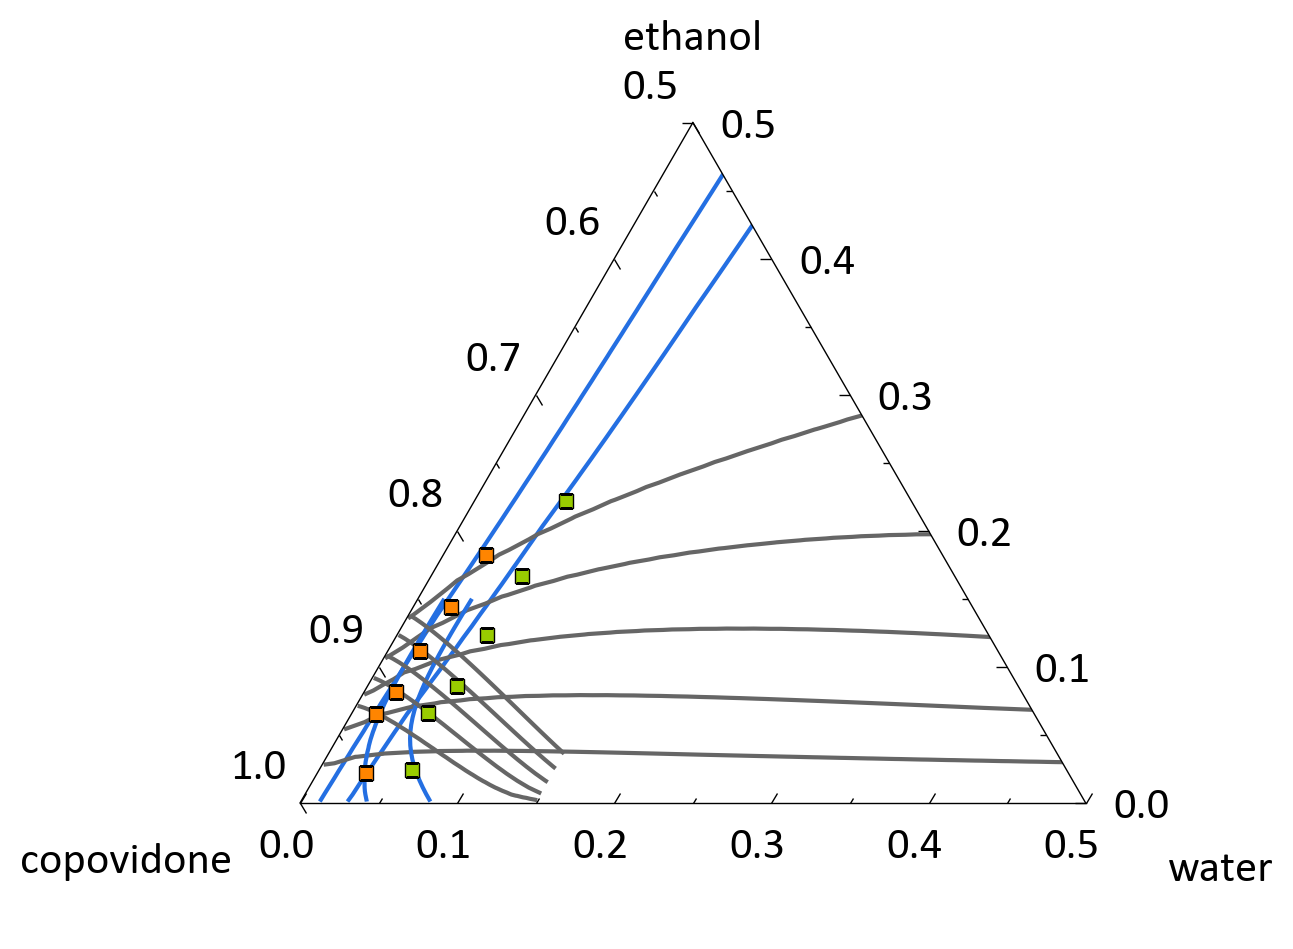

In [6]:
T=303.15
p=1E5
npoint=30

wwNET=np.linspace(0.001,0.15,npoint)
weNET=np.linspace(0.001,0.15,npoint)
wwSAFT=np.linspace(0.001,0.5,npoint)
weSAFT=np.linspace(0.001,0.5,npoint)
def isotherm(ww,we,DL,NET=False):
    RSvec=[]
    wwvec=[]
    wevec=[]
    for i,vali in enumerate(ww):
        for i,valj in enumerate(we):
            wASD=(1-vali-valj)
            par['vpure']=vpure(p,T,**par)
            wi=np.asarray([vali,valj,wASD*DL,wASD*(1-DL)])
            RS=NETVLE(T,wi,**netpar,**par,n=1) if NET else np.exp(lngi(T,wi,**par)+np.log(wi))[:2]
            RSvec.append(RS)
            wwvec.append(vali)
            wevec.append(valj)
    wwvec=np.asarray(wwvec)
    wevec=np.asarray(wevec)
    RSvec=np.fmin(np.fmax(np.asarray(RSvec),0),1)
    return wevec,wwvec,RSvec


wevec,wwvec,RSvec=isotherm(wwSAFT,weSAFT,0,NET=False)
figt1,axt1= plt.subplots(figsize=(6,5),subplot_kw=dict(projection='tern'),dpi=200)
cs1=axt1.tricontour(wevec,1-wevec-wwvec,wwvec,  RSvec[:,0],colors='C2',levels=[0.3,0.5],add_colorbar=False)
cs2=axt1.tricontour(wevec,1-wevec-wwvec,wwvec,  RSvec[:,1],colors='C6',levels=[0.1,0.2,0.3,0.4,0.5],add_colorbar=False)


# cax1 = axt1.inset_axes([1.05, 0.1, 0.05, 0.9], transform=axt1.transAxes)
axt1.set_ternary_lim(0, 0.5,  0.5, 1,  0, 0.5)
wevecnet,wwvecnet,RSvecnet=isotherm(wwNET,weNET,0,NET=True)
cs3=axt1.tricontour(wevecnet,1-wevecnet-wwvecnet,wwvecnet,  RSvecnet[:,0],colors='C2',levels=[0.3,0.5],add_colorbar=False)
cs4=axt1.tricontour(wevecnet,1-wevecnet-wwvecnet,wwvecnet,  RSvecnet[:,1],colors='C6',levels=[0.1,0.2,0.3,0.4,0.5],add_colorbar=False)


wwexp1=np.asarray([0.02739,0.02399,0.02025,0.02025,0.01541,0.03098])
weexp1=np.asarray([0.18201,0.14382,0.11166,0.08133,0.06541,0.02172])
wpexp1=np.asarray([0.7906,0.83219,0.86809,0.89843,0.91918,0.9473])


wwexp2=np.asarray([0.05832,0.05791,0.0574,0.05714,0.04835,0.05889])
weexp2=np.asarray([0.222023,0.16668,0.12315,0.08556,0.06593,0.02443])
wpexp2=np.asarray([0.72145,0.77541,0.81946,0.8573,0.88572,0.91669])

axt1.plot(weexp1,wpexp1,wwexp1,'C3s')
axt1.plot(weexp2,wpexp2,wwexp2,'C0s')
axt1.set_labels(label=" ",title="",xlabel='ethanol',ylabel='copovidone',zlabel="water")

plt.show()

C:\Users\smdoboet\AppData\Local\Temp\ipykernel_11760\1599738566.py:18: RuntimeWarning: invalid value encountered in log
  RS=NETVLE(T,wi,**netpar,**par,n=1) if NET else np.exp(lngi(T,wi,**par)+np.log(wi))[:2]


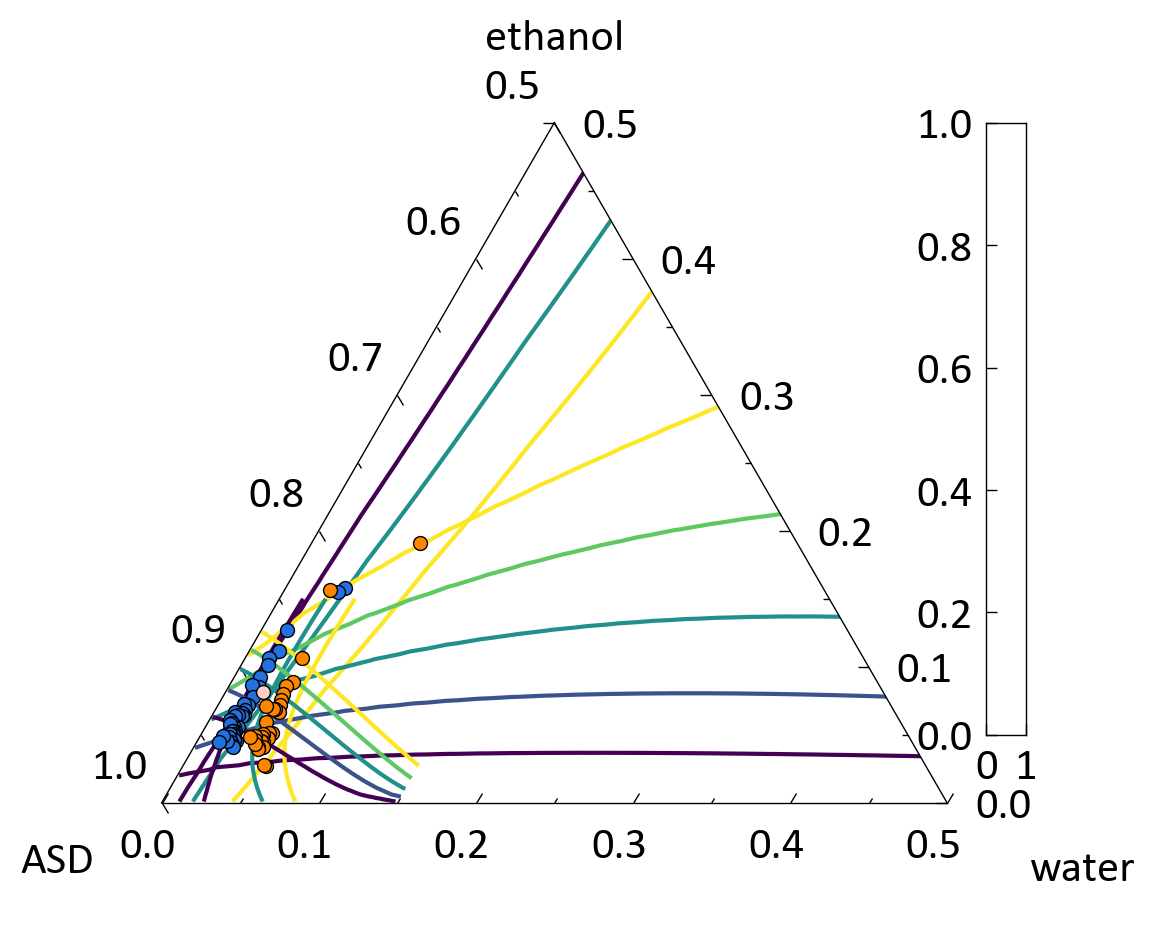

In [5]:
DL=0.1

wwNET=np.linspace(0.001,0.15,npoint)
weNET=np.linspace(0.001,0.15,npoint)
npoint=50
wwSAFT=np.linspace(0.001,1,npoint)
weSAFT=np.linspace(0.001,1,npoint)


wevec,wwvec,RSvec=isotherm(wwSAFT,weSAFT,DL,NET=False)
figt1,axt1= plt.subplots(figsize=(6,5),subplot_kw=dict(projection='tern'),dpi=200)
cs1=axt1.tricontour(wevec,1-wevec-wwvec,wwvec,  RSvec[:,0],levels=[0.3,0.5,0.7])
cs2=axt1.tricontour(wevec,1-wevec-wwvec,wwvec,  RSvec[:,1],levels=[0.1,0.2,0.3,0.4,0.5])


cax1 = axt1.inset_axes([1.05, 0.1, 0.05, 0.9], transform=axt1.transAxes)
axt1.set_ternary_lim(0, 0.5,  0.5, 1,  0, 0.5)
wevec,wwvec,RSvec=isotherm(wwNET,weNET,DL,NET=True)
cs3=axt1.tricontour(wevec,1-wevec-wwvec,wwvec,  RSvec[:,0],levels=[0.3,0.5,0.7])
cs4=axt1.tricontour(wevec,1-wevec-wwvec,wwvec,  RSvec[:,1],levels=[0.1,0.2,0.3,0.4,0.5])
axt1.set_labels(label=" ",title="",xlabel='ethanol',ylabel='ASD',zlabel="water")

wwexp3=[0.03766,0.03505,0.01624,0.01874,0.01544,0.0169,0.0165,0.01965,0.01439,0.01908,0.01917,0.01642,0.01907,0.02038,0.0182,0.01885,0.01363,0.01632,0.01469,0.02067,0.01302,0.01572,0.01829,0.02048,0.01496,0.01918,0.01815,0.0209,0.02073,0.01835,0.02434,0.02314,0.01849,0.02219,0.02448,0.02481,0.01901,0.01478,0.01391]
weexp3=[0.15828,0.15474,0.12743,0.11192,0.10641,0.10164,0.09266,0.08505,0.08684,0.07801,0.07192,0.07268,0.06824,0.06466,0.06603,0.06412,0.06661,0.06432,0.06414,0.05568,0.06085,0.05873,0.05558,0.05274,0.05781,0.05304,0.05314,0.0503,0.05001,0.05094,0.04551,0.04631,0.04858,0.04458,0.04201,0.04089,0.04581,0.04896,0.04472]
wpexp3=[0.80406,0.81021,0.85633,0.86935,0.87815,0.88145,0.89084,0.8953,0.89877,0.90291,0.9089,0.91089,0.91269,0.91495,0.91577,0.91704,0.91976,0.91936,0.92117,0.92365,0.92613,0.92556,0.92612,0.92678,0.92723,0.92778,0.92871,0.9288,0.92925,0.93071,0.93015,0.93055,0.93293,0.93323,0.93352,0.9343,0.93518,0.93626,0.94137]


wwexp4=[0.06903,0.02889,0.03575,0.03925,0.03627,0.03751,0.03828,0.03975,0.04148,0.0379,0.03608,0.03087,0.04475,0.03652,0.04253,0.0438,0.03902,0.04005,0.04237,0.04024,0.04414,0.03482,0.03645,0.04073,0.04151,0.03787,0.0318,0.05268,0.05157]
weexp4=[0.19094,0.15674,0.10683,0.0885,0.08617,0.0801,0.07591,0.07161,0.06664,0.0692,0.06933,0.07089,0.05164,0.05972,0.05137,0.04804,0.05053,0.04818,0.04451,0.04566,0.04082,0.04919,0.04658,0.04143,0.03997,0.04303,0.04859,0.02704,0.02758]
wpexp4=[0.74003,0.81438,0.85741,0.87224,0.87755,0.8824,0.88581,0.88864,0.89188,0.8929,0.89459,0.89823,0.90362,0.90376,0.9061,0.90816,0.91045,0.91177,0.91312,0.9141,0.91505,0.91599,0.91697,0.91784,0.91852,0.91911,0.91961,0.92027,0.92085]


wwexp5=[0.05344,0.05423,0.05562,0.05426,0.05501,0.05383,0.04641,0.0236]
weexp5=[0.85629,0.84643,0.8345,0.82707,0.81755,0.61711,0.52138,0.08162]
wpexp5=[0.09028,0.09934,0.10988,0.11867,0.12744,0.32907,0.43222,0.89478]

wwexp6=[0.10095,0.10132,0.10495,0.10481,0.09293,0.08861,0.09073]
weexp6=[0.80882,0.80098,0.7863,0.77494,0.64375,0.61305,0.59488]
wpexp6=[0.09024,0.0977,0.10876,0.12024,0.26332,0.29833,0.31439]


wwexp7=[0.20907,0.2113,0.21106,0.21522,0.21823,0.21571,0.21718]
weexp7=[0.70096,0.69121,0.67838,0.67266,0.58551,0.56459,0.52617]
wpexp7=[0.08996,0.0975,0.11056,0.11211,0.19626,0.2197,0.25665]

def get_line_from_tern(cs,idx):
    p = cs.collections[idx].get_paths()[0]
    v = p.vertices
    x = v[:,0]
    y = v[:,1]
    a=y
    b=0.5*(1-a)-x*np.sqrt(3)/2
    c=1-a-b
    return a,b,c

axt1.plot(weexp3,wpexp3,wwexp3,'C2o')
axt1.plot(weexp4,wpexp4,wwexp4,'C3o')
axt1.plot(weexp5,wpexp5,wwexp5,'C4o')
axt1.plot(weexp6,wpexp6,wwexp6,'C5o')
axt1.plot(weexp7,wpexp7,wwexp7,'C6o')